# Exploratory Data Analysis (EDA)

A Jupyter notebook to perform EDA on a dataset with attributes image_id, label, variety, and age for tasks related to classification and prediction.

## Import Required Libraries
Import libraries such as pandas, matplotlib, seaborn, and any other necessary libraries for data analysis and visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

sns.set_style()
plt.rcParams['figure.figsize'] = (10, 6)

## Load and Explore the Dataset
Load the dataset into a pandas DataFrame and display the first few rows to understand its structure.

**Note:** Replace `'your_dataset.csv'` with the actual path to your dataset file. The dataset is expected to have columns like `image_id`, `label`, `variety`, and `age`.

In [2]:
# Load the dataset
try:
    df = pd.read_csv('Dataset/meta_train.csv') 
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found.")
    
print("\n--- DataFrame Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset loaded successfully.

--- DataFrame Shape ---
Rows: 10407, Columns: 4


In [3]:
# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB

First 5 rows of the dataset:
     image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45

Summary Statistics:
          image_id   label variety           age
count        10407   10407   10407  10407.000000
unique       10407      10      10           NaN
top     100330.jpg  normal   ADT45           NaN
freq             1    1764    6992           NaN
m

## Check for Missing Values
Check for missing or null values in the dataset and handle them appropriately.

In [4]:
# Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() > 0:
    print("\nWarning: Missing values detected. Consider handling them.")
else:
    print("\nNo missing values found.")

Missing values per column:
image_id    0
label       0
variety     0
age         0
dtype: int64

No missing values found.


## Visualize Label Distribution
Create visualizations (e.g., bar plots or pie charts) to analyze the distribution of the 'label' attribute (healthy vs diseased).

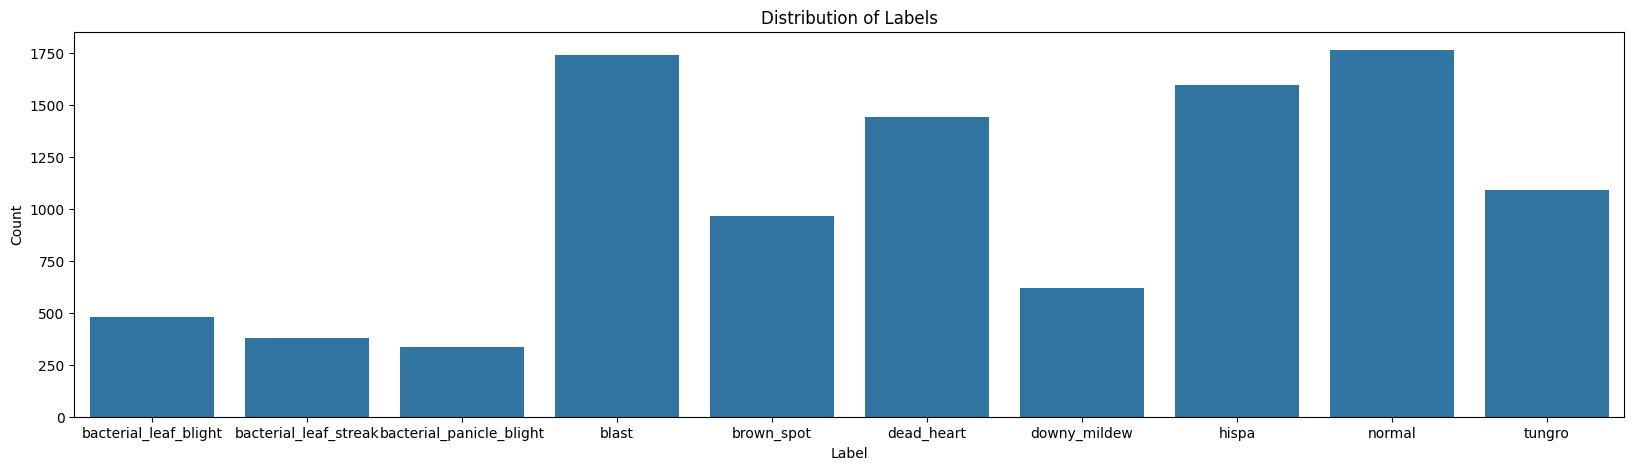

In [5]:
# Visualize the distribution of the 'label' column
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x='label')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

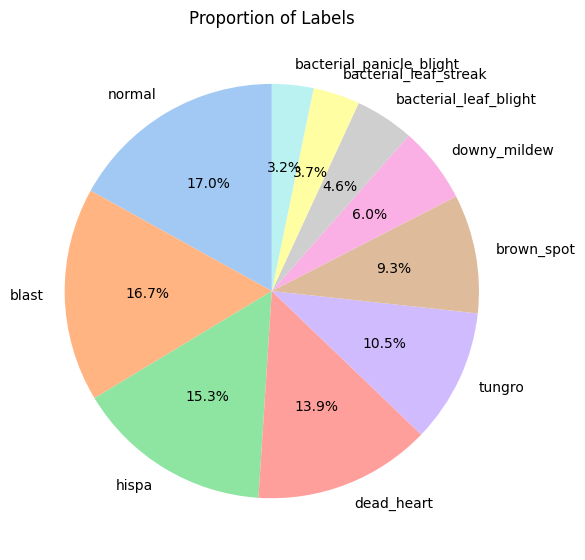

In [6]:
# Optional: Pie chart for label distribution
label_counts = df['label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Labels')
plt.tight_layout()
plt.show()

## Analyze Variety Distribution
Visualize the distribution of the 'variety' attribute to understand the frequency of each variety in the dataset.

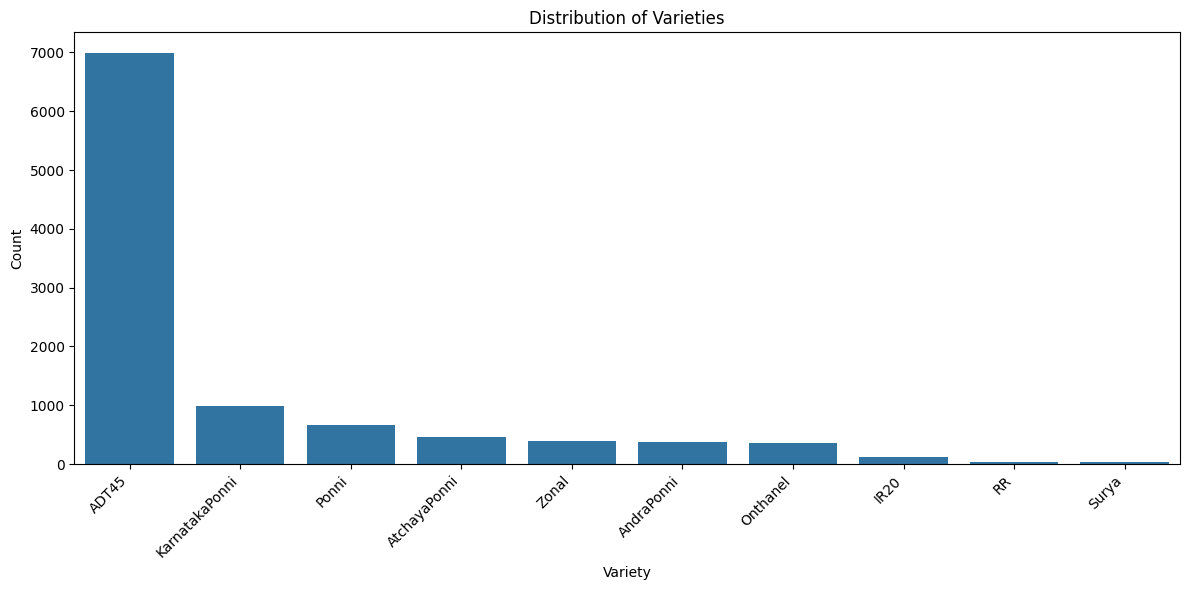

In [7]:
# Visualize the distribution of the 'variety' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='variety', order = df['variety'].value_counts().index) # Order by frequency
plt.title('Distribution of Varieties')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [8]:
print("--- Value Counts for 'label' ---")
print(df['label'].value_counts())

print("\n--- Value Counts for 'variety' ---")
print(df['variety'].value_counts())

print("\n--- Value Counts for 'age' ---")
print(df['age'].value_counts().sort_index())

--- Value Counts for 'label' ---
label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

--- Value Counts for 'variety' ---
variety
ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: count, dtype: int64

--- Value Counts for 'age' ---
age
45     505
47     112
50    1066
55     563
57     213
60    1660
62       5
65     774
66      36
67     415
68     253
70    3077
72     552
73      38
75     866
77      42
80     225
82       5
Name: count, dtype: int64


## Explore Age Distribution
Plot histograms or box plots to analyze the distribution of the 'age' attribute.

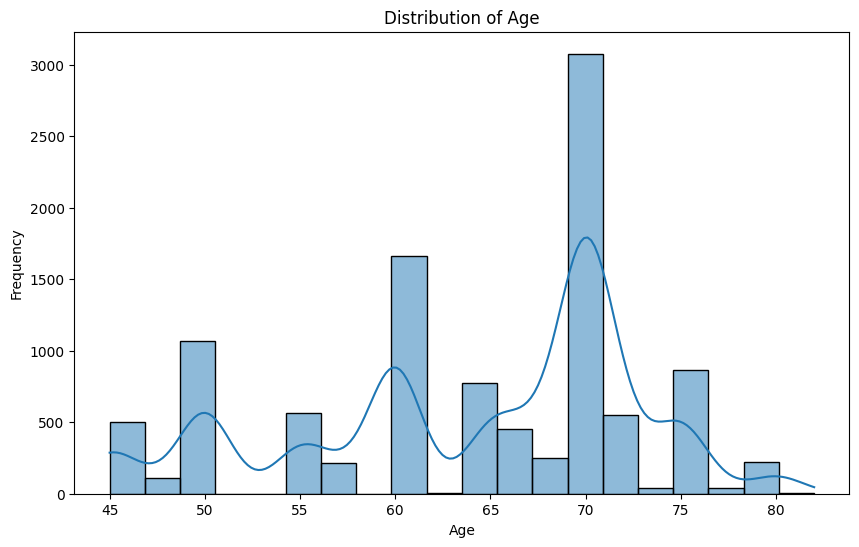

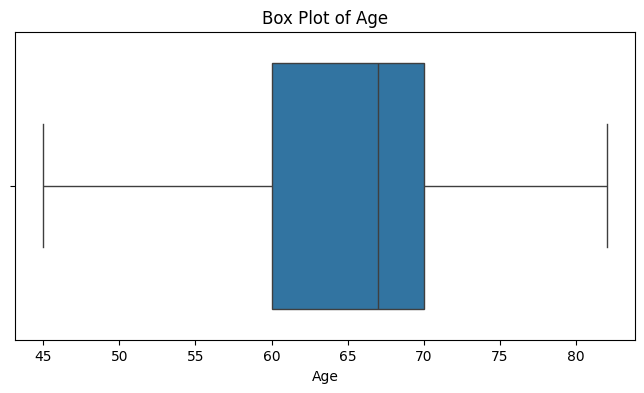

In [9]:
# Visualize the distribution of the 'age' column using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=20) # kde adds a density curve
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'age' using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='age')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

## Visualize Relationships Between Attributes
Use scatter plots, pair plots, or heatmaps to explore relationships between 'label', 'variety', and 'age'.

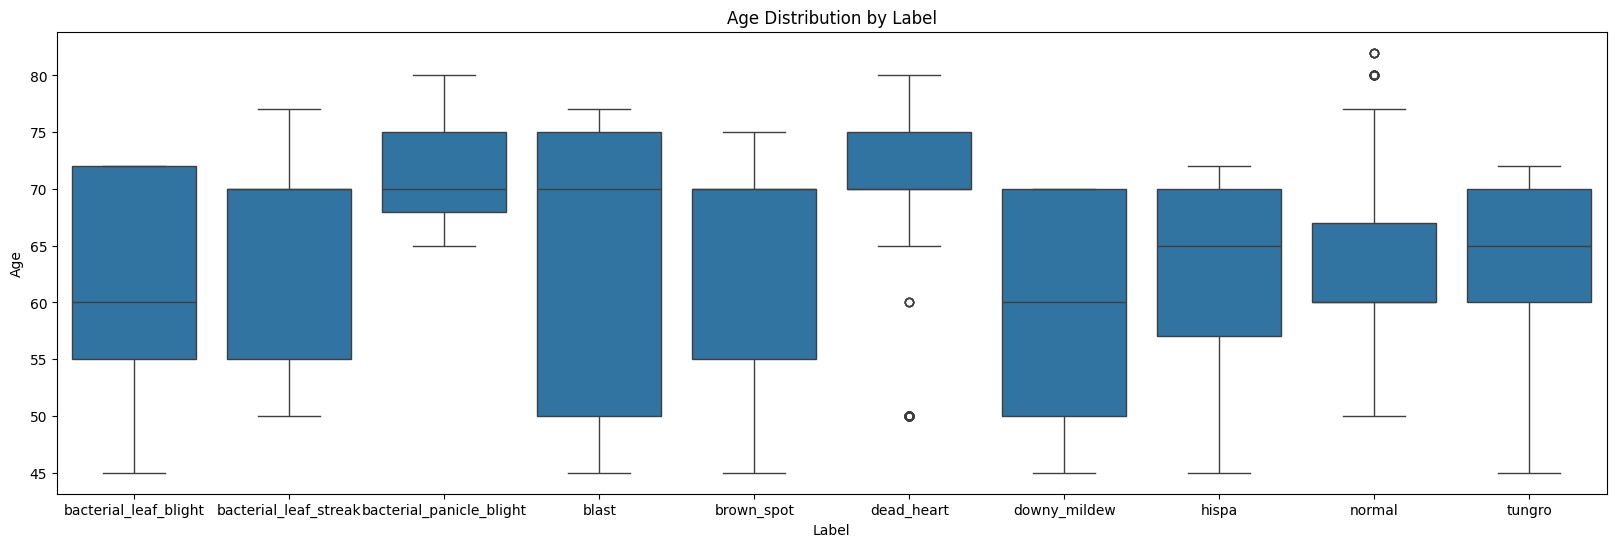

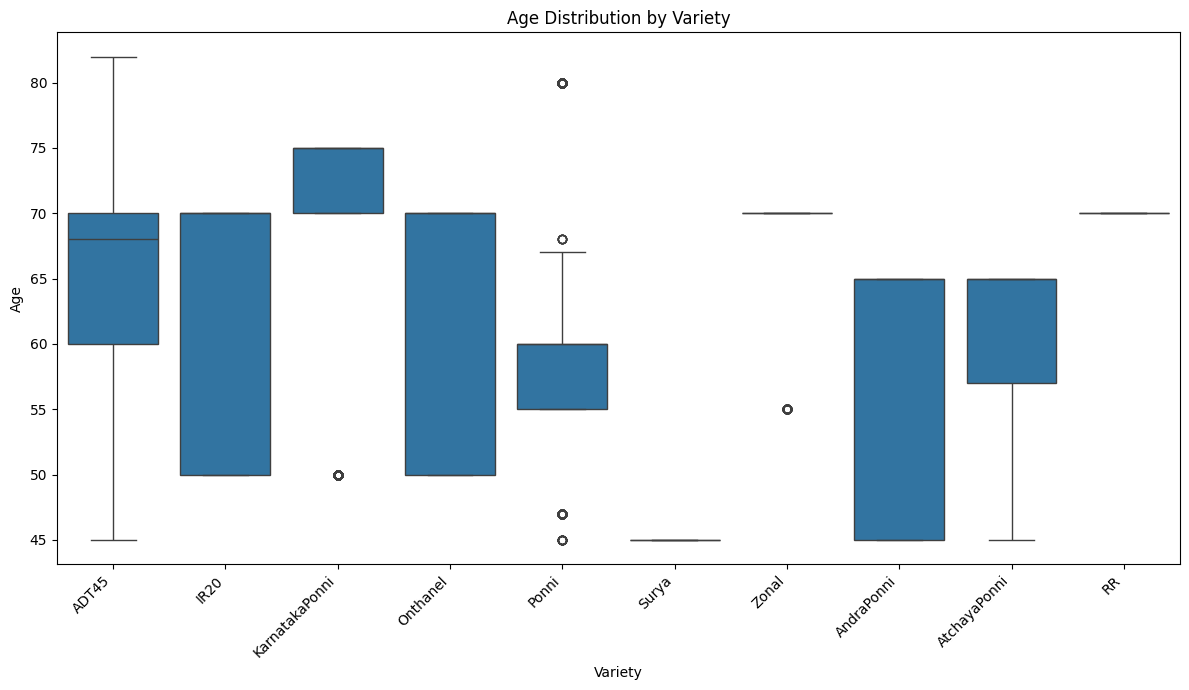

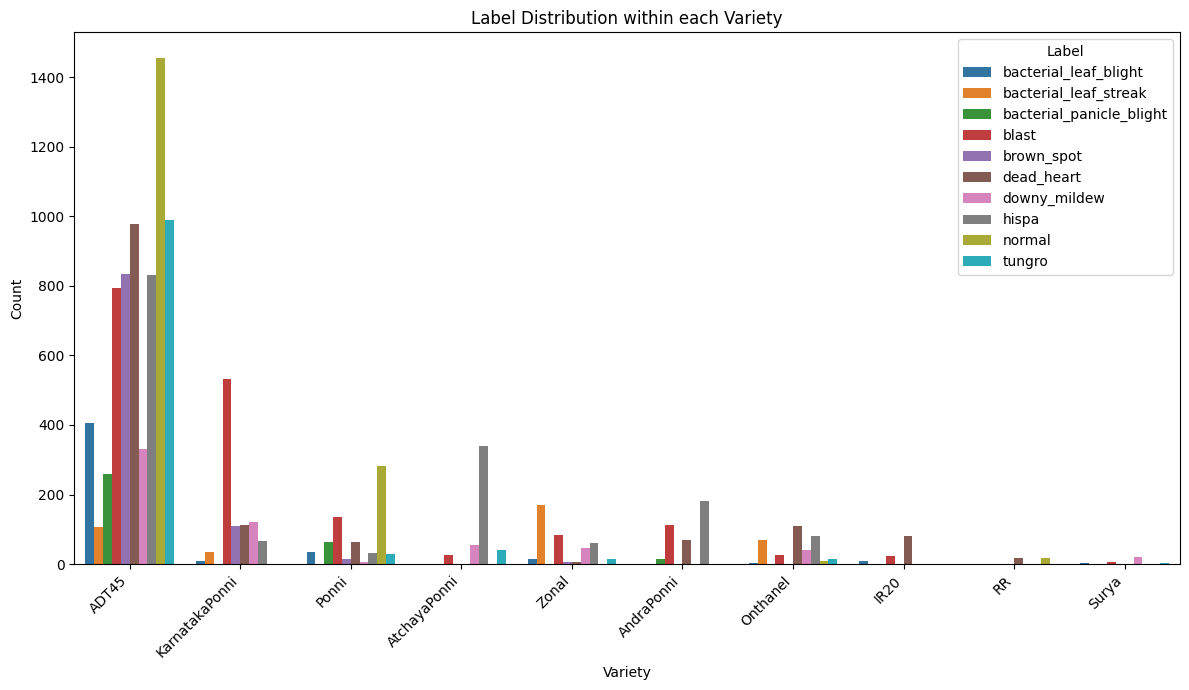

In [10]:
# Age and Label
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='label', y='age')
plt.title('Age Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Age')
plt.show()

# Age and Variety
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='variety', y='age')
plt.title('Age Distribution by Variety')
plt.xlabel('Variety')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Label and Variety
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='variety', hue='label', order = df['variety'].value_counts().index)
plt.title('Label Distribution within each Variety')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

## Visualize Sample Images per Label
Display a few sample images for each unique label to get a visual understanding of the classes.

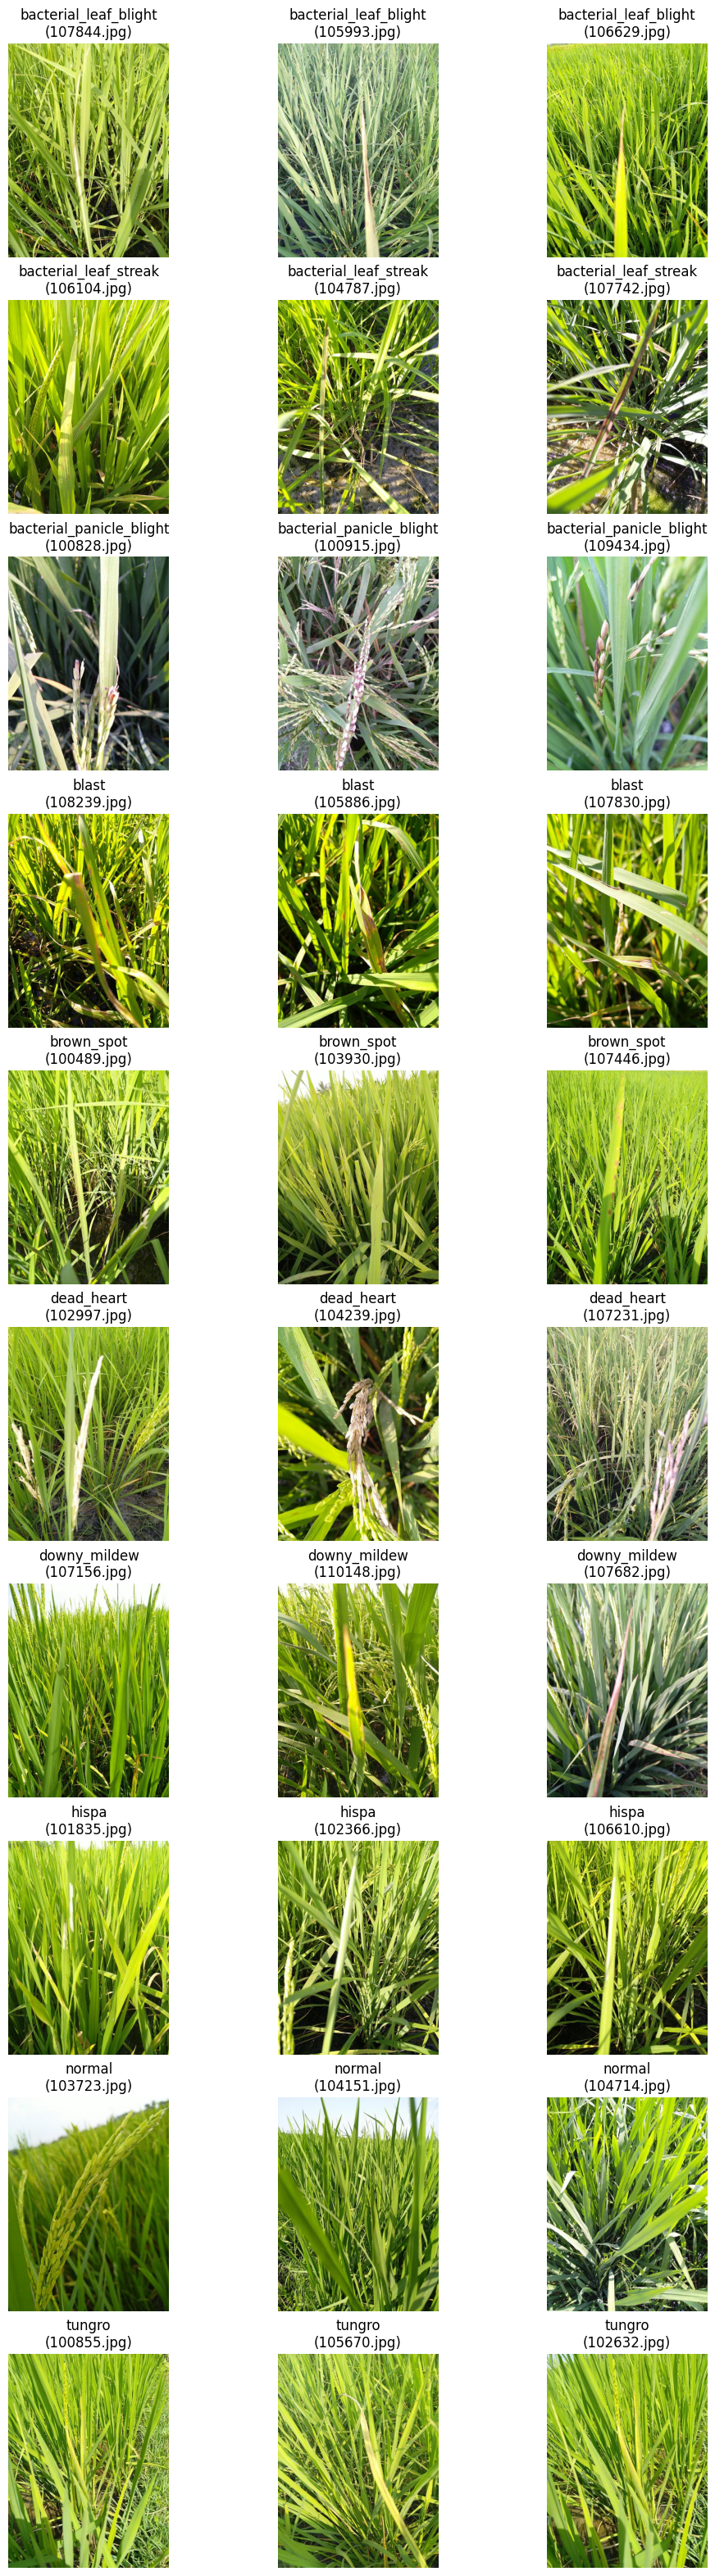

In [11]:
import os
from PIL import Image 
import random

image_dir = 'Dataset/train_images/'

# Get unique labels
unique_labels = df['label'].unique()
num_labels = len(unique_labels)
samples_per_label = 3 

fig, axes = plt.subplots(num_labels, samples_per_label, figsize=(samples_per_label * 4, num_labels * 4))

for i, label in enumerate(unique_labels):
    # Get image IDs for the current label
    label_image_ids = df[df['label'] == label]['image_id'].tolist()
    
    # Select random image
    num_available = len(label_image_ids)
    selected_image_ids = random.sample(label_image_ids, min(samples_per_label, num_available))

    for j, image_id in enumerate(selected_image_ids):
        ax = axes[i, j] if num_labels > 1 else axes[j] 
        # Construct the correct image path including the label subfolder
        img_path = os.path.join(image_dir, label, image_id)
        
        try:
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(f"{label}\n({image_id})")
            ax.axis('off')
        except FileNotFoundError:
            ax.set_title(f"{label}\n(Image not found!)")
            ax.axis('off')
        except Exception as e:
            ax.set_title(f"{label}\n(Error loading)")
            print(f"Error loading {img_path}: {e}")
            ax.axis('off')
        
    # Hide unused subplots
    for j in range(len(selected_image_ids), samples_per_label):
        ax = axes[i, j] if num_labels > 1 else axes[j]
        ax.axis('off')